In [415]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import cv2
from sklearn.model_selection import train_test_split

In [416]:
dataset='medical'
classes=os.listdir(dataset)
print(classes)

['AbdomenCT', 'BreastMRI', 'ChestCT', 'CXR', 'Hand', 'HeadCT']


In [417]:
file1=os.listdir(dataset+"/AbdomenCT")
print(len(file1))
print(file1[:5])

10000
['000000.jpeg', '000001.jpeg', '000002.jpeg', '000003.jpeg', '000004.jpeg']


In [418]:
file2=os.listdir(dataset+"/BreastMRI")
print(len(file2))
print(file2[:5])


8954
['000000.jpeg', '000001.jpeg', '000002.jpeg', '000003.jpeg', '000004.jpeg']


In [419]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [420]:
dataset=ImageFolder('medical' , transform=ToTensor())
print(dataset.classes)

['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']


In [421]:
img , label = dataset[0]
print(img.shape , label)




torch.Size([3, 64, 64]) 0


In [422]:
print(dataset.classes)

['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']


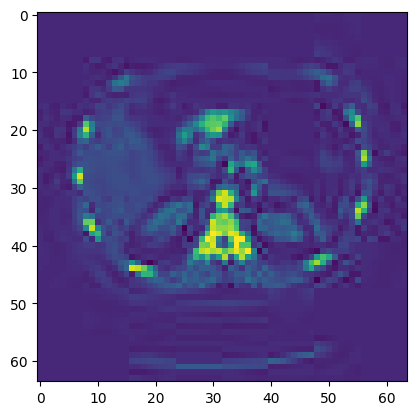

In [423]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img[0])

In [424]:
def show_eg(img , label):
    print(dataset.classes[label] ,"("+str(label)+")")
    plt.imshow(img.permute(1,2,0))

In [425]:
from torch.utils.data import SubsetRandomSampler
from torch.utils.data import DataLoader
import numpy as np

In [426]:
def split_indices(n , per):
    val_size=int(n*per)
    perm = np.random.permutation(n)
    return perm[val_size:] , perm[:val_size]

In [427]:
tr_set , vl_set = split_indices(len(dataset) , per= 0.1)
print(len(tr_set) , len(vl_set))
print(tr_set[:3])

53059 5895
[35647 57502  6538]


In [428]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [429]:
batch=512
train_indices, test_indices = train_test_split(list(range(len(dataset.targets))), test_size=0.2, stratify=dataset.targets)
train_ds = torch.utils.data.Subset(dataset, train_indices )
train_dl=DataLoader(train_ds , batch )
val_ds = torch.utils.data.Subset(dataset, test_indices)
valid_dl=DataLoader(val_ds , batch )

In [430]:
for i,j in train_dl:
    print(i.shape , j)
    break

torch.Size([512, 3, 64, 64]) tensor([4, 5, 4, 0, 0, 5, 2, 4, 4, 3, 5, 3, 0, 2, 3, 3, 2, 0, 4, 5, 2, 0, 1, 1,
        3, 2, 1, 2, 1, 1, 3, 2, 3, 1, 2, 3, 0, 3, 2, 3, 2, 5, 5, 2, 4, 4, 0, 0,
        0, 0, 4, 4, 5, 2, 3, 3, 1, 2, 3, 0, 1, 5, 1, 3, 2, 2, 4, 5, 1, 4, 4, 3,
        2, 1, 0, 4, 3, 4, 1, 3, 5, 3, 2, 1, 2, 0, 4, 5, 0, 3, 2, 0, 4, 3, 4, 3,
        2, 4, 3, 2, 1, 1, 0, 1, 3, 1, 1, 2, 3, 3, 0, 0, 3, 5, 3, 4, 1, 5, 1, 3,
        2, 4, 4, 1, 5, 3, 4, 2, 4, 1, 4, 4, 4, 1, 3, 3, 2, 5, 2, 5, 5, 2, 0, 1,
        4, 4, 4, 0, 2, 4, 1, 2, 4, 0, 5, 4, 5, 1, 2, 2, 2, 5, 2, 0, 0, 1, 0, 3,
        5, 3, 5, 5, 0, 2, 0, 4, 1, 5, 1, 5, 2, 0, 2, 1, 3, 2, 3, 3, 1, 1, 4, 1,
        5, 0, 0, 4, 0, 5, 3, 2, 0, 0, 1, 4, 2, 2, 0, 1, 1, 2, 1, 0, 4, 0, 5, 4,
        0, 1, 2, 1, 0, 0, 5, 4, 0, 2, 3, 4, 2, 2, 5, 3, 2, 2, 2, 0, 1, 5, 0, 5,
        0, 0, 3, 3, 3, 5, 4, 3, 1, 2, 4, 4, 5, 3, 0, 0, 0, 0, 1, 5, 2, 0, 2, 4,
        1, 2, 5, 5, 2, 0, 0, 1, 1, 5, 3, 5, 4, 2, 1, 4, 5, 2, 1, 5, 2, 3, 3, 4,
        3, 

In [431]:

# train_dataset=SubsetRandomSampler(tr_set)
# train_dl=DataLoader(dataset , batch , sampler=train_dataset)
# valid_dataset=SubsetRandomSampler(vl_set)
# valid_dl=DataLoader(dataset , batch , sampler=valid_dataset)

In [432]:
for images, labels in train_dl:
    print(images.shape)
    inputs=images.reshape(-1 , 12288)
    print(inputs.shape)
    break

torch.Size([512, 3, 64, 64])
torch.Size([512, 12288])


In [433]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

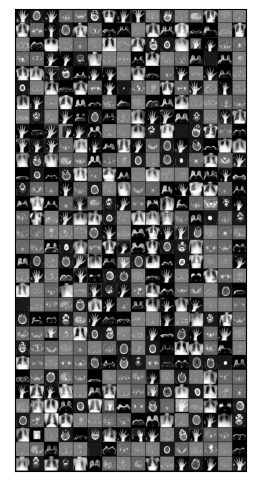

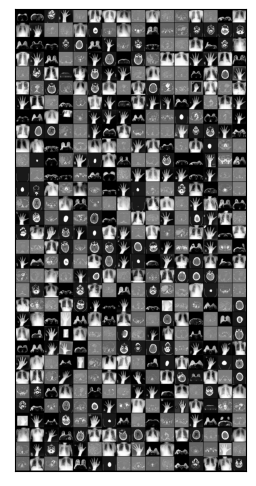

In [434]:
show_batch(train_dl)
show_batch(valid_dl)

In [435]:
import torch.nn as nn 
import torch.nn.functional as F

In [436]:
#calc loss from wg adn biases 
class imgclsfcn(nn.Module):
    def training(self , batch):
        images , labels = batch
        out=self(images)
        loss=F.cross_entropy(out , labels)
        return loss
  
    
    def validation(self , batch):
        images , labels = batch
        out = self(images)
        loss=F.cross_entropy(out , labels)
        acc= accuracy(out , labels)
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epc(self , outputs):
        batch_loss=[x['val_los'] for x in outputs]
        epoch_loss = torch.stack(batch_loss).mean()
        batch_acc = [x['bat_accc'] for x in outputs]
        epoch_acc = torch.stack(batch_acc).mean()
        return {'val_los': epoch_loss.item() , 'val_acc': epoch_acc.item()}   

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


In [437]:
img=cv2.imread('medical/AbdomenCT/000000.jpeg')
print(img.shape)

(64, 64, 3)


In [438]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3,6,3,1)
        self.conv2=nn.Conv2d(6,16,3,1)
        self.fc1=nn.Linear(3136,120) 
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,20)
        self.fc4=nn.Linear(20,len(classes))
    def forward(self,X):
        X=F.relu(self.conv1(X))
        X=F.max_pool2d(X,2,2)
        X=F.relu(self.conv2(X))
        X=F.max_pool2d(X,2,2)
        X=X.view(-1 ,3136)
        X=F.relu(self.fc1(X))
        X=F.relu(self.fc2(X))
        X=F.relu(self.fc3(X))
        X=self.fc4(X)

        
        return F.log_softmax(X,dim=1)

In [439]:
CNNmodel=ConvolutionalNetwork()
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(CNNmodel.parameters(),lr=0.001)

In [440]:
CNNmodel.to(device)

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=3136, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=6, bias=True)
)

In [445]:
import time
start_time=time.time()
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
epochs=5

for i in range(epochs):
    trn_corr=0
    tst_corr=0
    for b, (X_train,y_train) in enumerate(train_dl):
     
        X_train , y_train = X_train.to(device) , torch.tensor(y_train).to(device)
        b+=1 
                                 
        y_pred=CNNmodel(X_train)
       
        loss=criterion(y_pred,y_train).to(device)


        predicted=torch.max(y_pred.data,1)[1]
        
        batch_corr=(predicted==y_train).sum()

        trn_corr+=batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # print(batch_corr , predicted.shape)
        print(f"epoch: {i} loss: {loss.item()} batch: {b} accuracy: {batch_corr.item()/batch}%")
    loss=loss.cpu().detach().numpy()
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    
    with torch.no_grad():
        for b, (X_test,y_test) in enumerate(valid_dl):
            torch.tensor(X_test).to(device)
            y_val=CNNmodel(X_test)
            torch.tensor(y_val).to(device)
            loss=criterion(y_val,y_test)
            
            predicted=torch.max(y_val.data,1)[1]
            btach_corr=(predicted==y_test).sum()
            tst_corr+=btach_corr
            
        loss=loss.detach().numpy()
        test_losses.append(loss)
        test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds')   

C:\Users\acer predator\AppData\Local\Temp\ipykernel_13288\1579439622.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train , y_train = X_train.to(device) , torch.tensor(y_train).to(device)


epoch: 0 loss: 0.00751620065420866 batch: 1 accuracy: 0.998046875%
epoch: 0 loss: 0.02049952559173107 batch: 2 accuracy: 0.99609375%
epoch: 0 loss: 0.0027748756110668182 batch: 3 accuracy: 1.0%
epoch: 0 loss: 0.008756069466471672 batch: 4 accuracy: 0.99609375%
epoch: 0 loss: 0.016052808612585068 batch: 5 accuracy: 0.994140625%
epoch: 0 loss: 0.005336263217031956 batch: 6 accuracy: 0.998046875%
epoch: 0 loss: 0.019105300307273865 batch: 7 accuracy: 0.998046875%
epoch: 0 loss: 0.01006827037781477 batch: 8 accuracy: 0.99609375%
epoch: 0 loss: 0.024238362908363342 batch: 9 accuracy: 0.994140625%
epoch: 0 loss: 0.00617839302867651 batch: 10 accuracy: 0.998046875%
epoch: 0 loss: 0.004260237328708172 batch: 11 accuracy: 1.0%
epoch: 0 loss: 0.012922370806336403 batch: 12 accuracy: 0.994140625%
epoch: 0 loss: 0.003081792965531349 batch: 13 accuracy: 1.0%
epoch: 0 loss: 0.009516938589513302 batch: 14 accuracy: 0.998046875%
epoch: 0 loss: 0.004744714125990868 batch: 15 accuracy: 1.0%
epoch: 0 los

C:\Users\acer predator\AppData\Local\Temp\ipykernel_13288\1579439622.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(X_test).to(device)


RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor